In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

#ВВодим входные данные
u_val = np.array([i * 100 for i in range(3, 14)], dtype=np.float64)
ro = np.array([8933, 8870, 8628, 8779, 8728, 8656, 8622, 8657, 8509,
               8451, 8394], dtype=np.float64)
c = np.array([385, 397, 408, 417, 425, 433, 442, 451, 464, 480,
              507], dtype=np.float64)
lamb = np.array([401, 393, 386, 379, 373, 366, 359, 352, 346, 339,
                 332], dtype=np.float64)

Рассмотрим, какую зависимость имеют величины $\rho,\ c, \ \lambda \ $ от u

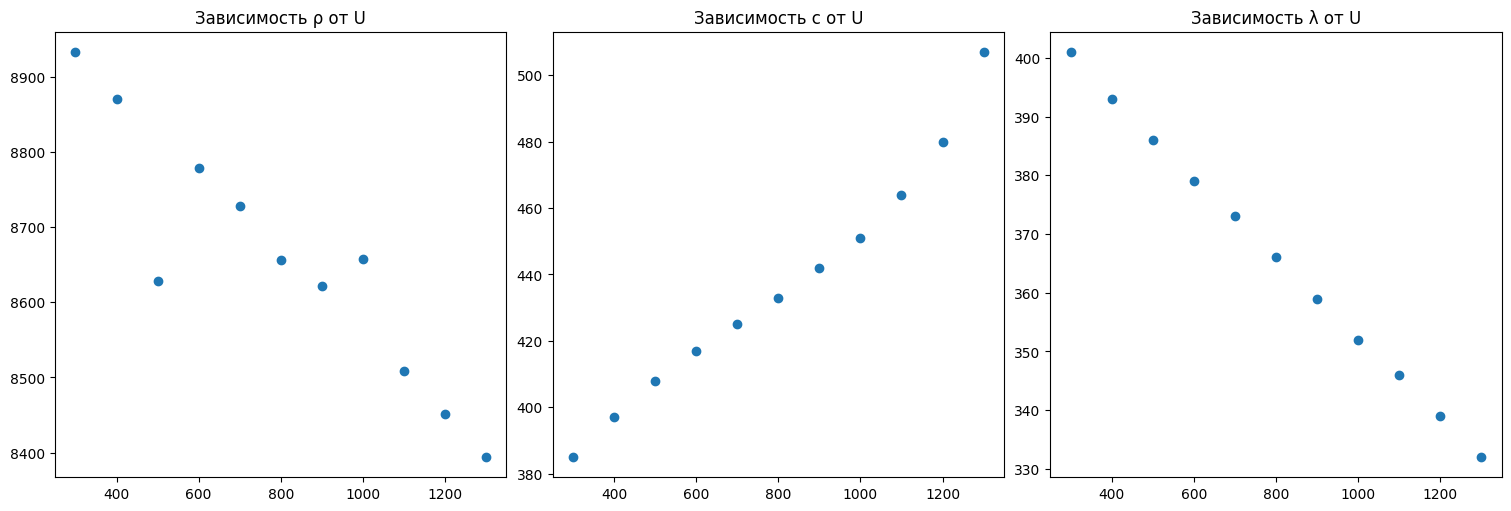

In [73]:
fig, axs = plt.subplots(1, 3, constrained_layout = True)

axs[0].scatter(u_val,ro)
axs[0].set_title("Зависимость \u03C1 от U")
axs[1].scatter(u_val,c)
axs[1].set_title("Зависимость с от U")
axs[2].scatter(u_val,lamb)
axs[2].set_title("Зависимость \u03BB от U")

fig.set_size_inches((15, 5)) 

Очевидно, что оптимальным будет приближение с помощью полинома

In [74]:
#Исключим выбросы из ro

ro_opt =  np.array([8933, 8870, 8779, 8728, 8656, 8622, 8509,
                    8451, 8394], dtype=np.float64)
u_for_ro = np.array([ 300,  400,  600,  700,  800,  900, 1100,
                     1200, 1300], dtype=np.float64)


Найдем оптимальную степень аппроксимации по МНК для $\rho(u) \ $ по значениям среднеквадратичной ошибки

Степень 1: Значение среднеквадратичной ошибки= 47.73037716615502
Степень 2: Значение среднеквадратичной ошибки= 39.547726944344895
Степень 3: Значение среднеквадратичной ошибки= 38.36033684917183
Степень 4: Значение среднеквадратичной ошибки= 38.06559500704338
Степень 5: Значение среднеквадратичной ошибки= 33.2720976341675
Степень 6: Значение среднеквадратичной ошибки= 21.688820022050862
Степень 7: Значение среднеквадратичной ошибки= 19.52034649632145


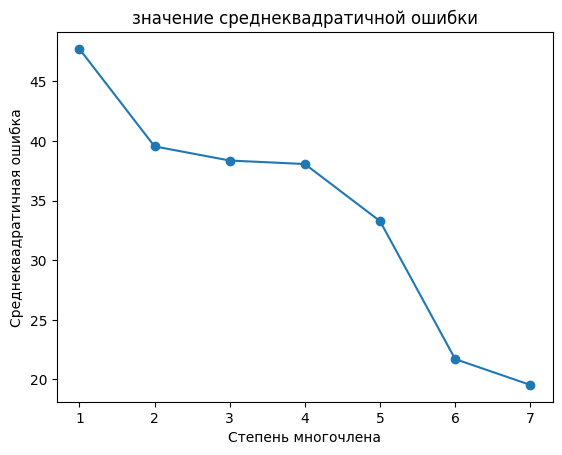

In [75]:
# Задаем степени полиномов
degrees = np.arange(1, 8)

# Подготовим массив для хранения среднеквадратичных ошибок
mse_values = []

# Аппроксимация и вычисление среднеквадратичной ошибки для каждой степени
for degree in degrees:
    coefficients = np.polyfit(u_for_ro, ro_opt, degree)
    y_pred = np.polyval(coefficients, u_for_ro)
    mse = np.mean((ro_opt - y_pred)**2)
    mse_values.append(mse)

# Вывод результатов
for degree, mse in zip(degrees, mse_values):
    print(f"Степень {degree}: Значение среднеквадратичной ошибки= {mse}")

# Построение графика среднеквадратичной ошибки по степеням полинома
plt.plot(degrees, mse_values, marker='o')
plt.title('значение среднеквадратичной ошибки')
plt.xlabel('Степень многочлена')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()

Видим, что минимальной оптимальной степенью является 3

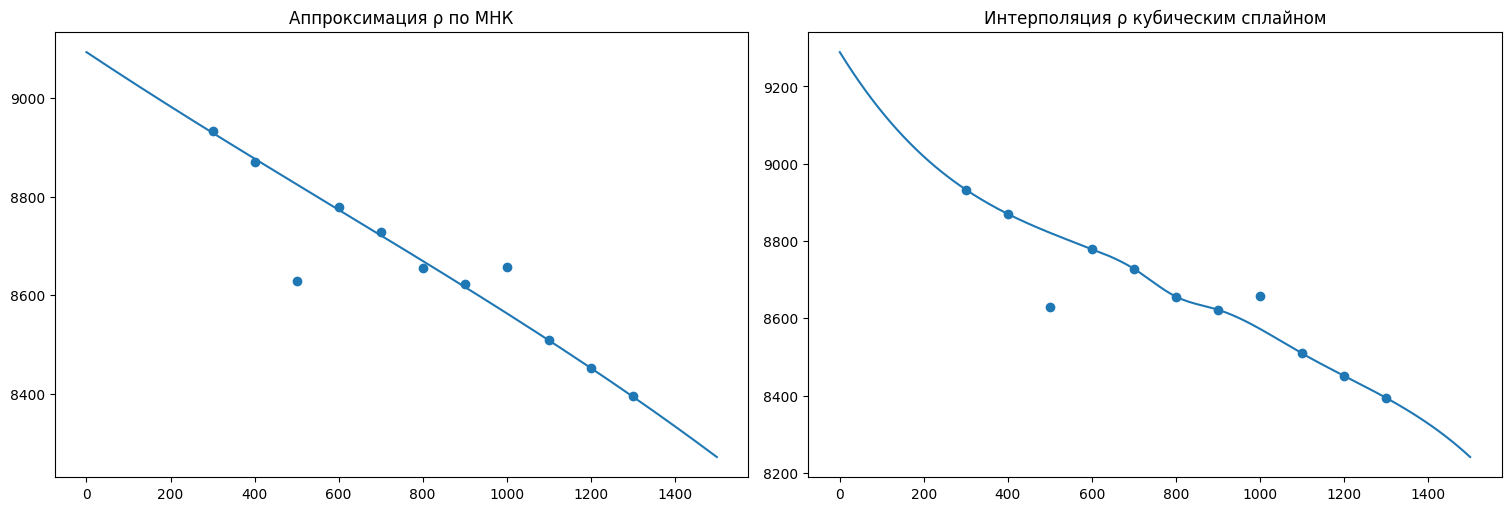

In [76]:
x = np.linspace(0, 1500, 200)

fig, axs = plt.subplots(1, 2, constrained_layout = True)
fig.set_size_inches((15, 5)) 

coefficients_ro = np.polyfit(u_for_ro, ro_opt, 3) #Аппроксимация по МНК
y_MNK = np.polyval(coefficients_ro, x) 
cub_s_ro = CubicSpline(u_for_ro, ro_opt)#Интерполяция кубическим сплайном
y_cub = cub_s_ro(x)

axs[0].plot(x, y_MNK)
axs[0].scatter(u_val, ro)
axs[0].set_title("Аппроксимация \u03C1 по МНК")
axs[1].plot(x, y_cub)
axs[1].scatter(u_val, ro)
axs[1].set_title("Интерполяция \u03C1 кубическим сплайном")
plt.show()


Найдем оптимальную степень аппроксимации по МНК для $с(u) \ $ по значениям среднеквадратичной ошибки

Степень 1: Значение среднеквадратичной ошибки= 38.326446280991576
Степень 2: Значение среднеквадратичной ошибки= 18.826446280991796
Степень 3: Значение среднеквадратичной ошибки= 1.278236914600577
Степень 4: Значение среднеквадратичной ошибки= 0.281415554142811
Степень 5: Значение среднеквадратичной ошибки= 0.1322314049586918
Степень 6: Значение среднеквадратичной ошибки= 0.0575595527467406
Степень 7: Значение среднеквадратичной ошибки= 0.05709210575521035


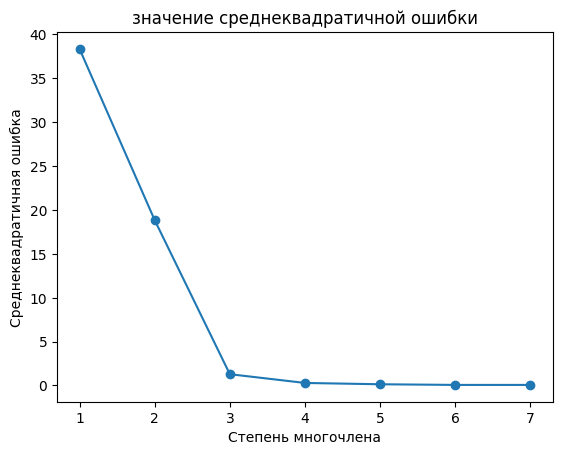

In [77]:
mse_values = []

# Аппроксимация и вычисление среднеквадратичной ошибки для каждой степени
for degree in degrees:
    coefficients = np.polyfit(u_val, c, degree)
    y_pred = np.polyval(coefficients, u_val)
    mse = np.mean((c - y_pred)**2)
    mse_values.append(mse)

for degree, mse in zip(degrees, mse_values):
    print(f"Степень {degree}: Значение среднеквадратичной ошибки= {mse}")

plt.plot(degrees, mse_values, marker='o')
plt.title('значение среднеквадратичной ошибки')
plt.xlabel('Степень многочлена')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()

Видим, что оптимальной степенью является 4

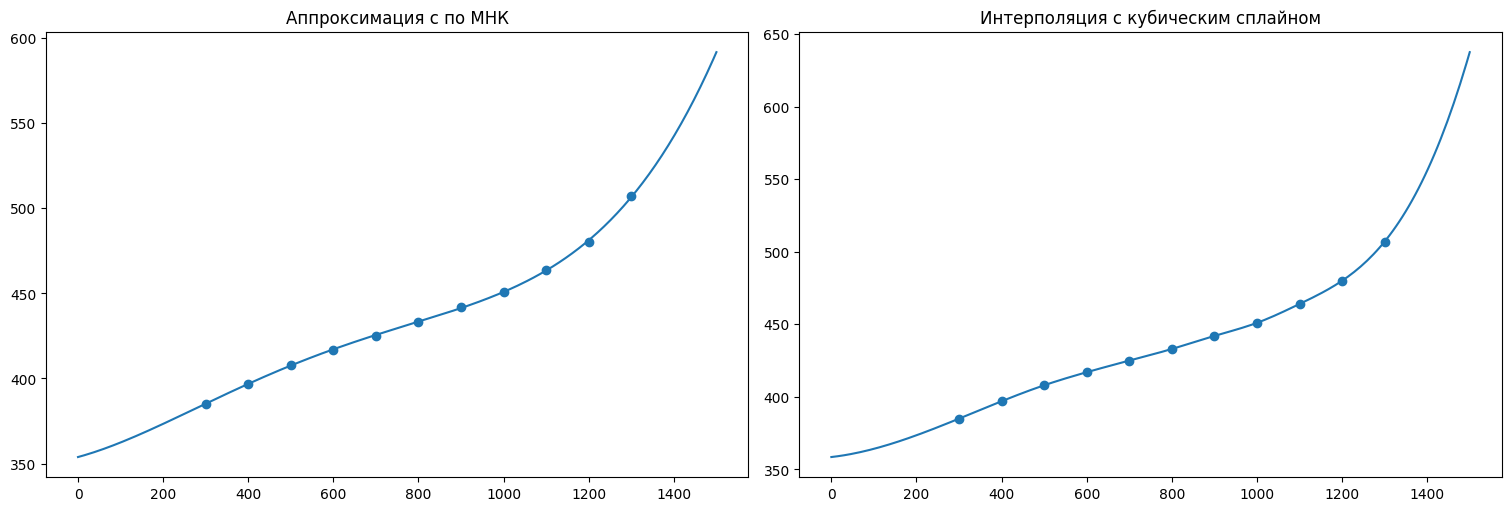

In [78]:

fig, axs = plt.subplots(1, 2, constrained_layout = True)
fig.set_size_inches((15, 5)) 

coefficients_c = np.polyfit(u_val, c, 4) #Аппроксимация по МНК
y_MNK = np.polyval(coefficients_c, x) 
cub_s_c = CubicSpline(u_val,c)#Интерполяция кубическим сплайном
y_cub = cub_s_c(x)

axs[0].plot(x, y_MNK)
axs[0].scatter(u_val, c)
axs[0].set_title("Аппроксимация c по МНК")
axs[1].plot(x, y_cub)
axs[1].scatter(u_val, c)
axs[1].set_title("Интерполяция c кубическим сплайном")
plt.show()

Найдем оптимальную степень аппроксимации по МНК для $\lambda(u) \ $ по значениям среднеквадратичной ошибки

Степень 1: Значение среднеквадратичной ошибки= 0.18099173553719008
Степень 2: Значение среднеквадратичной ошибки= 0.1342657342657342
Степень 3: Значение среднеквадратичной ошибки= 0.08338631065903687
Степень 4: Значение среднеквадратичной ошибки= 0.06781097690189025
Степень 5: Значение среднеквадратичной ошибки= 0.03925619834711246
Степень 6: Значение среднеквадратичной ошибки= 0.0356830335439946
Степень 7: Значение среднеквадратичной ошибки= 0.025791855203616557


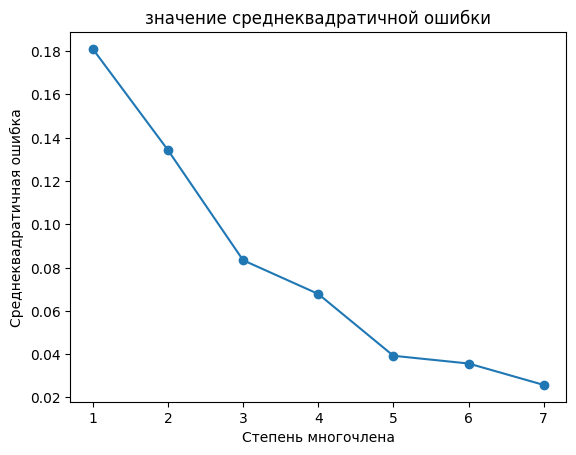

In [79]:
mse_values = []

# Аппроксимация и вычисление среднеквадратичной ошибки для каждой степени
for degree in degrees:
    coefficients = np.polyfit(u_val, lamb, degree)
    y_pred = np.polyval(coefficients, u_val)
    mse = np.mean((lamb - y_pred)**2)
    mse_values.append(mse)

for degree, mse in zip(degrees, mse_values):
    print(f"Степень {degree}: Значение среднеквадратичной ошибки= {mse}")

plt.plot(degrees, mse_values, marker='o')
plt.title('значение среднеквадратичной ошибки')
plt.xlabel('Степень многочлена')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()

Видим, что оптимальной степенью является 3

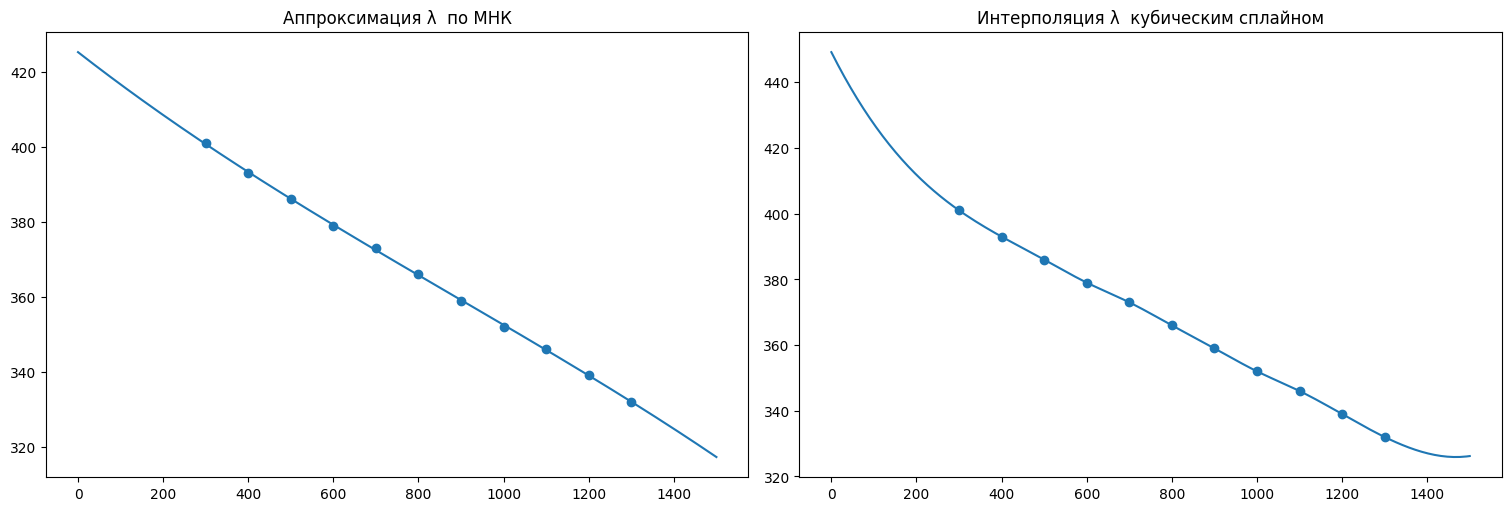

In [80]:

fig, axs = plt.subplots(1, 2, constrained_layout = True)
fig.set_size_inches((15, 5)) 

coefficients_lamb = np.polyfit(u_val, lamb, 3) #Аппроксимация по МНК
y_MNK = np.polyval(coefficients_lamb, x) 
cub_s_lamb = CubicSpline(u_val, lamb)#Интерполяция кубическим сплайном
y_cub = cub_s_lamb(x)

axs[0].plot(x, y_MNK)
axs[0].scatter(u_val, lamb)
axs[0].set_title("Аппроксимация \u03BB  по МНК")
axs[1].plot(x, y_cub)
axs[1].scatter(u_val, lamb)
axs[1].set_title("Интерполяция \u03BB  кубическим сплайном")
plt.show()

In [81]:


def ro_function(u):
    return np.polyval(coefficients_ro, u)

def c_function(u):
    return np.polyval(coefficients_c, u)

def lamb_function(u):
    return np.polyval(coefficients_lamb, u)



$$c(u) \cdot p(u) \cdot \frac{\partial u}{\partial t} = \lambda(u) \cdot \frac{\partial ^2u}{\partial x^2} + f$$ 
Предположим, что у нас есть пространственная сетка с шагом по координате $\Delta x$ и временная сетка с шагом по времени $\Delta t$. Обозначим значение функцииu в узлах сетки как $u_{i,j}$, где i - индекс по координате, j - индекс по времени. Построим явную разностную схему $\\$
Используем аппроксимацию производных 
$$\frac{\partial ^2 u}{\partial x^2} \approx \frac{u_{i-1,j} - 2\cdot u_{i,j} + u_{i+1,j}}{(\Delta x)^2} \\
\frac{\partial u}{\partial t} \approx \frac{u_{i,j+1} - u_{i,j}}{\Delta t} \\
$$
Подставим апрроксимации в уравнение:
$$ c(u_{i,j})p(u_{i,j}) \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = \lambda (u_{i,j}) \frac{u_{i-1,j} - 2\cdot u_{i,j} + u_{i+1,j}}{(\Delta x)^2} + f $$

$$u_{i,j+1} = \frac{\lambda _{i,j}}{c_{i,j} \cdot p_{i,j}} \cdot \frac{\Delta t}{(\Delta x)^2} \cdot (u_{i-1,j} - 2 \cdot u_{i,j} + u_{i+1,j}) + \frac{\Delta t}{c_{i,j}\cdot p_{i,j}}\cdot f + u_{i,j} $$

Начальные условия: $$u(0,t) = U_0 \\ u(l,t) = U_1 \\ u(x,0) = T_0$$

Шаг по времени $\Delta t = \tau, \ $ шаг по координате $\Delta x = h$

Пусть количество шагов по оси времени = 20, а по координатной оси = 10
$ \\ x \in [0,1], \ t \in [0,\infty]$ (для конкретики возьмем правой границей времени t = 1000)

Чтоб расплавить стержень, для начала возьмем такие начальные данные: на одном конце будет температура 1400К, на другом 1400К, стержень по всей длинне изначально имеет комнатную температуру. Плотность внешних источников, для начала, пусть будет f = 1

Решим краевую задачу, используя аппроксимацию по МНК

In [82]:
theme = "turbo"


A = (max(lamb_function(0),lamb_function(1400))/(min(c_function(0),c_function(1400))*min(ro_function(0),ro_function(1400))))


T = 10000
N_x = 30
h = 1/N_x
tau = (h**2)/(2*A)
N_t = round(T/tau)
Ux0 = 0 #начальная температра стержня

def U0(x): #Функция нагрева левого края стержня
    res = Ux0 +1000 / 1500 *3*(x+1)
    if res <= 1400:
        return res
    else: return 1400
def U1(x): #функция нагрева правого края стержня
    res = Ux0 +1000 / 1500*3*(x+1)
    if res <= 1400:
        return res
    else: return 1400


def f(x):
    return 1000*x
u = np.zeros((N_x,N_t))

#Начальные условия
for i in range(N_x):
    u[i,0] = Ux0
for i in range(N_t):
    u[0,i] = U0(i)

for i in range(N_t):
    u[N_x-1,i] = U1(i)

for j in range(N_t-1):
    u[1:N_x-1, j+1] = (lamb_function(u[1:N_x-1, j]) / (c_function(u[1:N_x-1, j]) * ro_function(u[1:N_x-1, j])) 
        * tau/(h**2) * (u[0:N_x-2, j] - 2*u[1:N_x-1, j] + u[2:N_x, j]) + tau * f(np.linspace(0+h,1-h,N_x-2))
        /(c_function(u[1:N_x-1, j]) * ro_function(u[1:N_x-1, j])) + u[1:N_x-1, j])

solved_u = np.copy(u)


In [83]:
# from matplotlib.animation import FuncAnimation


# length = 1.0  


# x_values = np.linspace(0, length, N_x)
# initial_temperature = solved_u[:,0]
# temperature = initial_temperature.copy()
# # Создание объекта графика
# fig, ax = plt.subplots()

# # Инициализация тепловой карты
# im = ax.imshow([temperature], extent=[0, length, 0, 1], aspect='auto', cmap=theme,vmax = 1400,vmin = 0, animated=True)

# def update(frame):

#     im.set_array([solved_u[:,frame]])
#     return im,

# # Создание анимации
# animation = FuncAnimation(fig, update, frames=range(1,N_t,1), interval=50, blit=True)


# # Отображение анимации

# plt.colorbar(im, label='Температура')
# fig.set_size_inches((20, 3)) 
# plt.axis('off')
# plt.close()
# animation.save('animation.mp4', writer='ffmpeg', fps=30)



<Figure size 640x480 with 0 Axes>

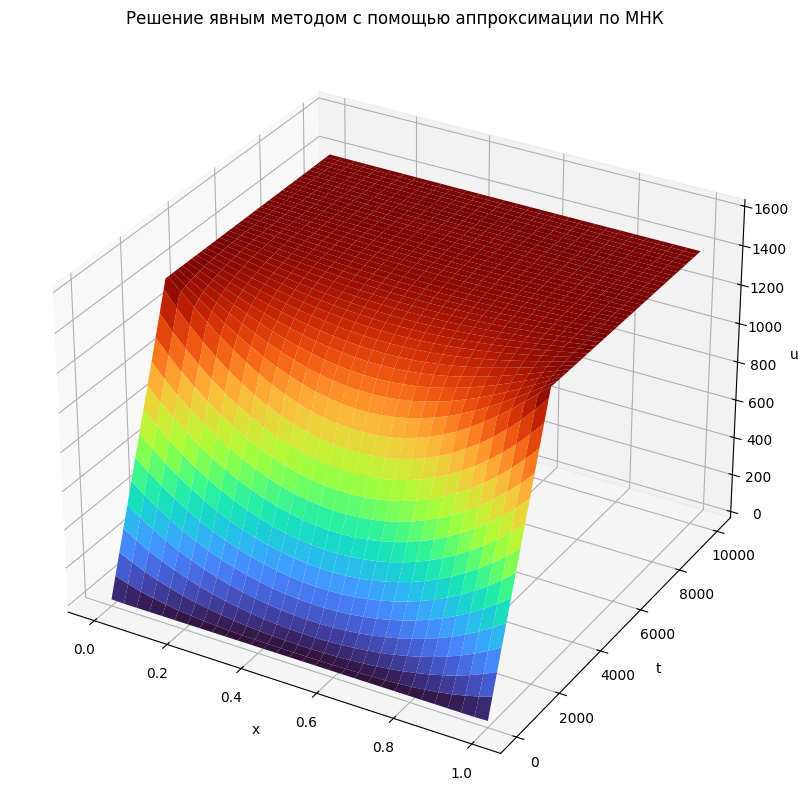

In [84]:

# Создаем данные для графика
x = np.linspace(0, 1, N_x)  
t = np.linspace(0, T, N_t)  
t, x = np.meshgrid(t, x)

# Создаем трехмерный график
fig = plt.figure()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, u, cmap=theme)
u = np.rot90(u)
ax.set_title("Решение явным методом с помощью аппроксимации по МНК")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_zlim([Ux0,1600])
plt.show()


Решим краевую задачу используя кубический сплайн

In [14]:

u = np.zeros((N_x,N_t))
#Начальные условия
for i in range(N_x):
    u[i,0] = Ux0
for i in range(N_t):
    u[0,i] = U0(i)

for i in range(N_t):
    u[N_x-1,i] = U1(i)

for j in range(N_t-1):
    u[1:N_x-1, j+1] = (cub_s_lamb(u[1:N_x-1, j]) / (cub_s_c(u[1:N_x-1, j]) * cub_s_ro(u[1:N_x-1, j])) *
        tau/(h**2) * (u[0:N_x-2, j] - 2*u[1:N_x-1, j] + u[2:N_x, j]) + tau * f(np.linspace(0+h,1-h,N_x-2))
        /(cub_s_c(u[1:N_x-1, j]) * cub_s_ro(u[1:N_x-1, j])) + u[1:N_x-1, j])


<Figure size 640x480 with 0 Axes>

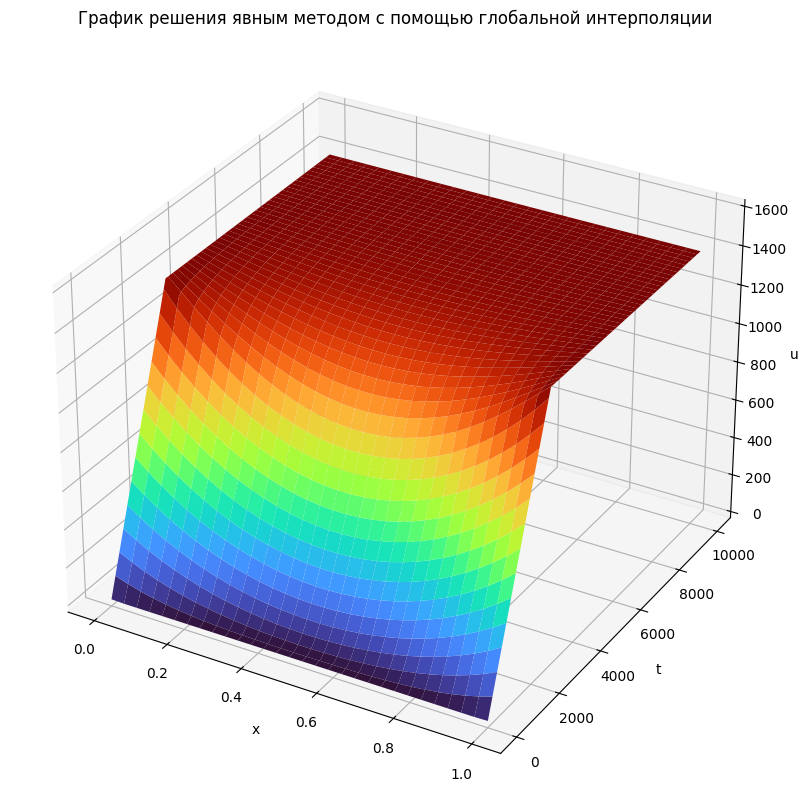

In [15]:
# Создаем данные для графика
x = np.linspace(0, 1, N_x)  
t = np.linspace(0, T, N_t)  
t, x = np.meshgrid(t, x)

# Создаем трехмерный график
fig = plt.figure()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, u, cmap=theme)
u = np.rot90(u)
ax.set_title("График решения явным методом с помощью глобальной интерполяции")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_zlim([Ux0,1600])
plt.show()

<font size = 4>

Построим неявную разностную схему
$$\frac{\partial ^2 u}{\partial x^2} \approx \frac{u_{i-1,j+1} - 2\cdot u_{i,j+1} + u_{i+1,j+1}}{(\Delta x)^2} \\
\frac{\partial u}{\partial t} \approx \frac{u_{i,j+1} - u_{i,j}}{\Delta t} \\
$$
Подставим апрроксимации в уравнение:
$$ \frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t} (u_{i,j+1} - u_{i,j} )= \frac{\lambda (u_{i,j+1})}{(\Delta x)^2} (u_{i-1,j+1} - 2\cdot u_{i,j+1} + u_{i+1,j+1} )+ f \\ $$

$$ u_{i,j+1}\frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t} - u_{i,j}\frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t} =  u_{i-1,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2} - 2\cdot u_{i,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2} + u_{i+1,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2}+ f \\ $$


$$ u_{i,j+1}\frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t} + 2\cdot u_{i,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2} =  u_{i-1,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2}+ u_{i,j}\frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t}  + u_{i+1,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2}+ f \\ $$

$$ u_{i,j+1} =  \frac{u_{i-1,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2}+ u_{i,j}\frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t}  + u_{i+1,j+1}\frac{\lambda (u_{i,j+1})}{(\Delta x)^2}+ f}{\frac{c(u_{i,j+1})\rho(u_{i,j+1})}{\Delta t} + 2\cdot \frac{\lambda (u_{i,j+1})}{(\Delta x)^2}} \\ $$

<font>


$$u_{i,j+1} = \frac{u_{i-1,j+1}\lambda (u_{i,j+1})\Delta t+ u_{i,j}c(u_{i,j+1})\rho(u_{i,j+1})(\Delta x)^2  + u_{i+1,j+1}\lambda (u_{i,j+1}) \Delta t+ f\Delta t (\Delta x)^2}{c(u_{i,j+1})\rho(u_{i,j+1}) (\Delta x)^2+ 2\cdot \lambda (u_{i,j+1})\Delta t}$$

<font size = 4>

Имеем, что для $\forall j \\ $

$$
\left\{
\begin{gathered}
u_{0,j+1} = U0(x)\\
u_{1,j+1} = \frac{u_{0,j+1}\lambda (u_{1,j+1})\Delta t+ u_{1,j}c(u_{1,j+1})\rho(u_{1,j+1})(\Delta x)^2  + u_{2,j+1}\lambda (u_{1,j+1}) \Delta t+ f\Delta t (\Delta x)^2}{c(u_{1,j+1})\rho(u_{1,j+1}) (\Delta x)^2+ 2\cdot \lambda (u_{1,j+1})\Delta t}\\
u_{2,j+1} = \frac{u_{1,j+1}\lambda (u_{2,j+1})\Delta t+ u_{2,j}c(u_{2,j+1})\rho(u_{2,j+1})(\Delta x)^2  + u_{3,j+1}\lambda (u_{2,j+1}) \Delta t+ f\Delta t (\Delta x)^2}{c(u_{2,j+1})\rho(u_{2,j+1}) (\Delta x)^2+ 2\cdot \lambda (u_{2,j+1})\Delta t}\\
\vdots \\
u_{N_x, j+1} = U1(x)
\end{gathered}
\right.
$$

Решение системы методом релаксации

In [16]:

def sceme(x,h,tau,q): #Реализация одной итерации метода релаксации
    omega = 0.1
    res = np.zeros(len(x))
    res[0] = x[0]
    res[-1] = x[-1]
    for i in range(1,len(x)-1):
        res[i] = (x[i-1] * lamb_function(x[i])* tau + q[i] * c_function(x[i]) * ro_function(x[i]) * h**2 
            + x[i+1] * lamb_function(x[i])*tau + f(x[i])*tau * h**2)/(c_function(x[i]) 
            * ro_function(x[i]) * h**2 + 2 * lamb_function(x[i]) * tau)
        res[i] = omega*res[i] + (1-omega)*x[i]
    return res
u = np.zeros((N_x,N_t))

#Начальные условия
for i in range(N_x):
    u[i,0] = Ux0
for i in range(N_t):
    u[0,i] = U0(i)

for i in range(N_t):
    u[N_x-1,i] = U1(i)
    
    

for j in range (0,N_t-1):
    buff = np.copy(u[0:N_x,j+1])
    u[0:N_x,j+1] = sceme(u[0:N_x,j+1],h,tau,u[0:N_x,j])    
    while max(abs(buff - u[0:N_x,j+1])) >0.1:
        buff = np.copy(u[0:N_x,j+1])
        u[0:N_x,j+1] = sceme(u[0:N_x,j+1],h,tau,u[0:N_x,j])
        

<Figure size 640x480 with 0 Axes>

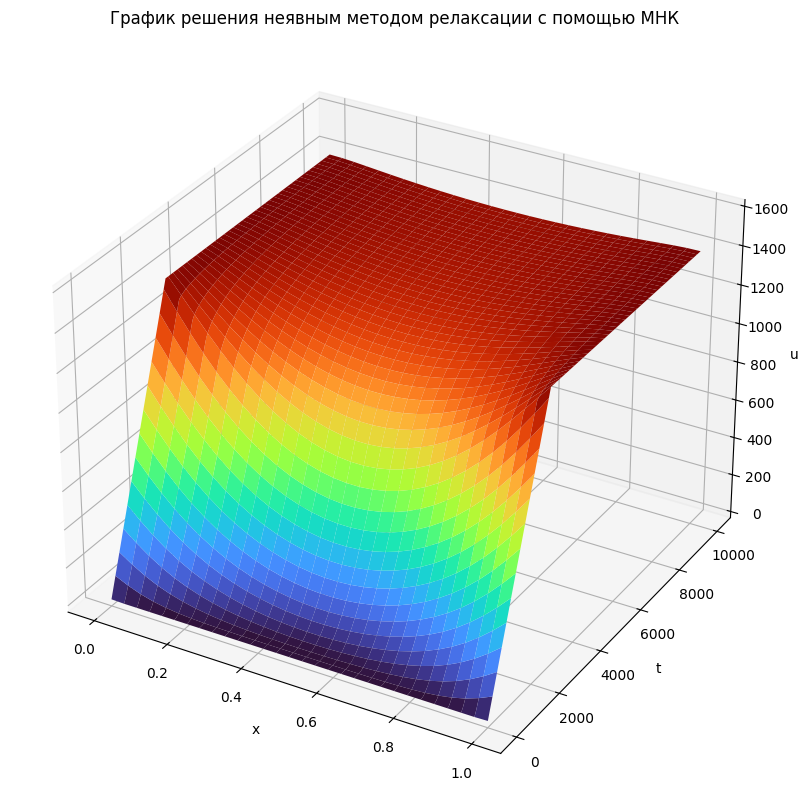

In [17]:

# Создаем данные для графика
x = np.linspace(0, 1, N_x)  
t = np.linspace(0, T, N_t)  
t, x = np.meshgrid(t, x)

# Создаем трехмерный график
fig = plt.figure()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, u, cmap="turbo")
u = np.rot90(u)
ax.set_title("График решения неявным методом релаксации с помощью МНК")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_zlim([Ux0,1600])
plt.show()

In [18]:

def sceme(x,h,tau,q): #Реализация одной итерации метода релаксации
    omega = 0.1
    res = np.zeros(len(x))
    res[0] = x[0]
    res[-1] = x[-1]
    for i in range(1,len(x)-1):
        res[i] = (x[i-1] * cub_s_lamb(x[i])* tau + q[i] * cub_s_c(x[i]) * cub_s_ro(x[i]) * h**2 
            + x[i+1] * cub_s_lamb(x[i])*tau + f(x[i])*tau * h**2)/(cub_s_c(x[i]) 
            * cub_s_ro(x[i]) * h**2 + 2 * cub_s_lamb(x[i]) * tau)
        res[i] = omega*res[i] + (1-omega)*x[i]
    return res
u = np.zeros((N_x,N_t))

#Начальные условия
for i in range(N_x):
    u[i,0] = Ux0
for i in range(N_t):
    u[0,i] = U0(i)

for i in range(N_t):
    u[N_x-1,i] = U1(i)
    
    

for j in range (0,N_t-1):
    buff = np.copy(u[0:N_x,j+1])
    u[0:N_x,j+1] = sceme(u[0:N_x,j+1],h,tau,u[0:N_x,j])    
    while max(abs(buff - u[0:N_x,j+1])) >0.1:
        buff = np.copy(u[0:N_x,j+1])
        u[0:N_x,j+1] = sceme(u[0:N_x,j+1],h,tau,u[0:N_x,j])


<Figure size 640x480 with 0 Axes>

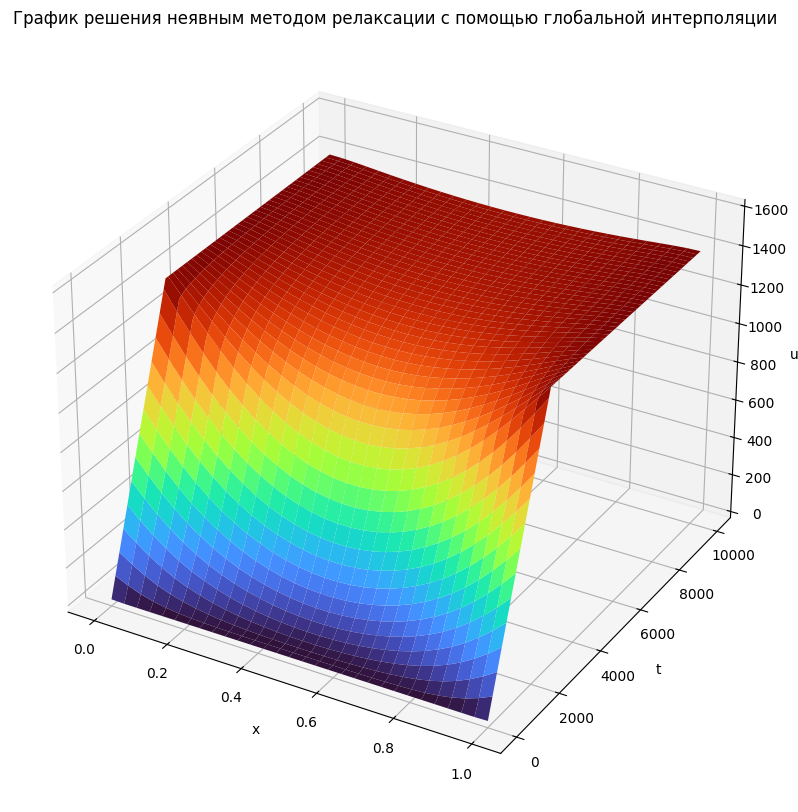

In [19]:

# Создаем данные для графика
x = np.linspace(0, 1, N_x)  
t = np.linspace(0, T, N_t)  
t, x = np.meshgrid(t, x)

# Создаем трехмерный график
fig = plt.figure()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, u, cmap="turbo")
u = np.rot90(u)
ax.set_title("График решения неявным методом релаксации с помощью глобальной интерполяции")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_zlim([Ux0,1600])
plt.show()

Теперь будем подставлять в функции не j+1 значение u, а j, тогда сможем более точно найти решение прямым методом Гаусса

In [23]:
u = np.zeros((N_x,N_t))

#Начальные условия
for i in range(N_x):
    u[i,0] = Ux0
for i in range(N_t):
    u[0,i] = U0(i)

for i in range(N_t):
    u[N_x-1,i] = U1(i)

for j in range(0,N_t-1):
    A = np.zeros((N_x,N_x))
    A[0,0] = 1
    A[N_x-1, N_x-1] = 1
    for i in range(1, N_x-1):
        A[i,i-1] = -lamb_function(u[i,j])/h**2
        A[i,i] = c_function(u[i,j])*ro_function(u[i,j])/tau + 2*lamb_function(u[i,j])/h**2
        A[i,i+1] = -lamb_function(u[i,j])/h**2
        
    F = np.zeros(N_x)
    F[0] = u[0,j+1]
    F[N_x-1] = u[N_x-1,j+1]
    for i in range(1,N_x-1):
        F[i] = f(10) +  u[i,j]* c_function(u[i,j])*ro_function(u[i,j])/tau
        
    u[:,j+1] = np.linalg.solve(A,F)

<Figure size 640x480 with 0 Axes>

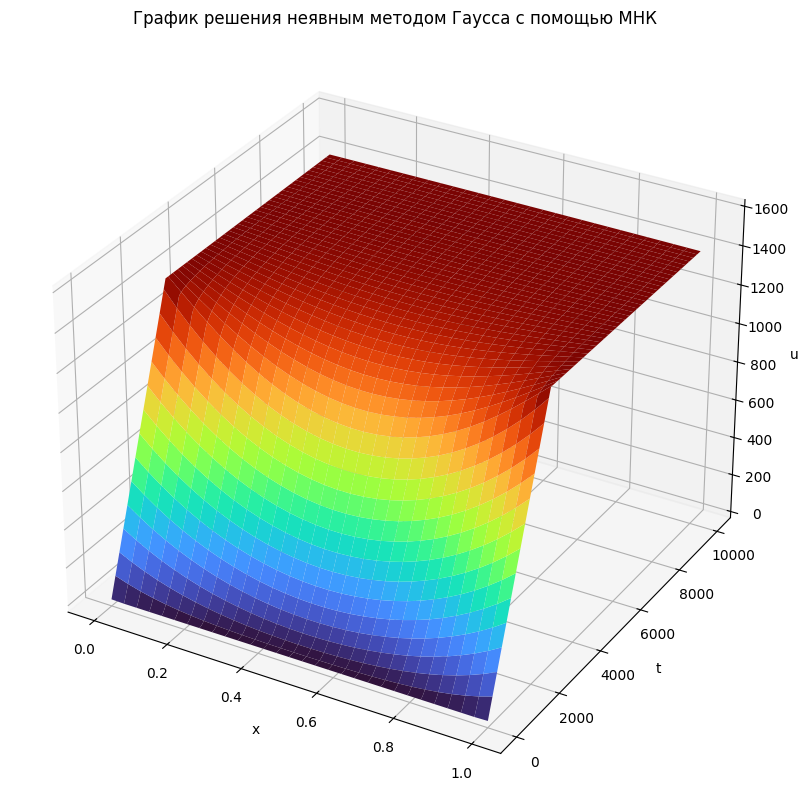

In [24]:
# Создаем данные для графика
x = np.linspace(0, 1, N_x)  
t = np.linspace(0, T, N_t)  
t, x = np.meshgrid(t, x)

# Создаем трехмерный график
fig = plt.figure()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, u, cmap=theme)
u = np.rot90(u)
ax.set_title("График решения неявным методом Гаусса с помощью МНК")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_zlim([Ux0,1600])
plt.show()